<a href="https://colab.research.google.com/github/3bdo-Yahya/Image-Processing/blob/main/Section_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import skimage
from skimage import data
import matplotlib.pyplot as plt # For displaying images

In [22]:
camera = data.camera()
camera.dtype

dtype('uint8')

In [23]:
camera.shape

(512, 512)

In [24]:
# Load camera image from file using io.imread
# Construct file path using skimage's data directory
from skimage import io
import os

filename = os.path.join(skimage.data_dir, 'camera.jpg')
camera = io.imread(filename)

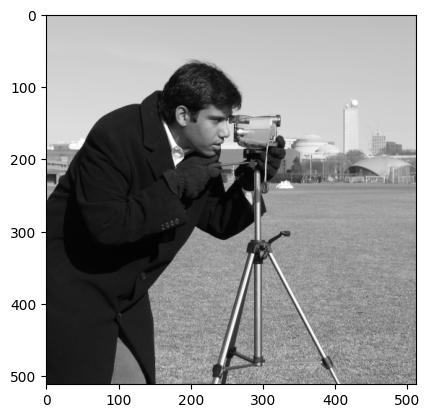

In [25]:
plt.imshow(camera, cmap='gray')
io.imsave('camera_copy.png', camera)

In [26]:
# Apply Gaussian blur filter to the camera image
# sigma=5 controls the blur intensity
# Returns numpy array type
from skimage import filters

filtered_camera = filters.gaussian(camera, 5)
type(filtered_camera)

numpy.ndarray

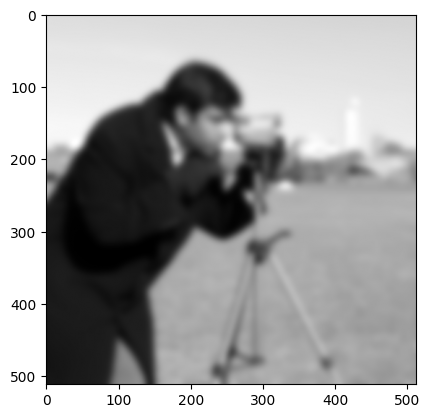

In [27]:
plt.imshow(filtered_camera, cmap='gray') # Display the Gaussian blurred image

In [28]:
# --- Implementation Section ---

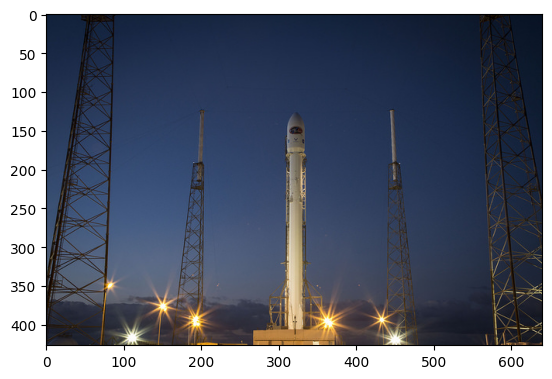

In [29]:
image = data.rocket()
plt.imshow(image)

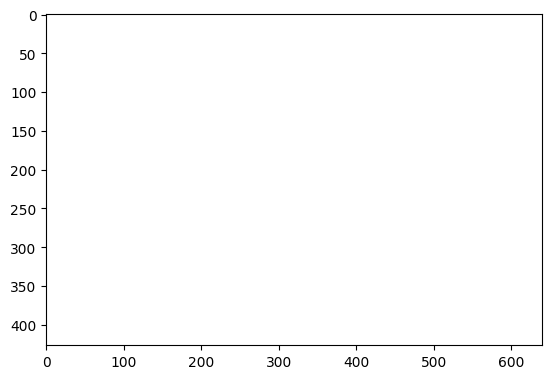

In [30]:
# Add constant value (500) to the image using OpenCV
# cv2.add handles overflow by capping at 255
import cv2

image_add = cv2.add(image, 500)
plt.imshow(image_add)

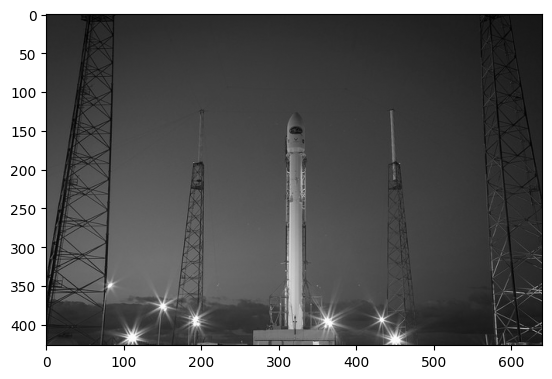

In [31]:
# Convert the color rocket image to grayscale
# Display the grayscale version
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap='gray')

In [32]:
# Get the dimensions of the grayscale image
# rows = height, cols = width
rows, cols = image_gray.shape

In [33]:
def addConstToEachPixel(image, const):
    rows, cols = image.shape
    output = image.copy()
    for r in range(rows):
        for c in range(cols):
            pixel = int(image[r, c])
            newPixel = pixel + const
            if newPixel > 255:
                newPixel = 255
            elif newPixel < 0:
                newPixel = 0
            else:
                output[r, c] = newPixel
    return output

Text(0.5, 1.0, 'Image after adding 100 to each pixel')

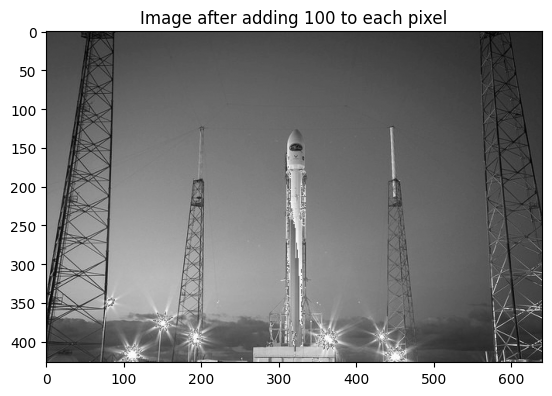

In [34]:
# Apply the addConstToEachPixel function to brighten the image
# Add 100 to each pixel value and display the result
plt.imshow(addConstToEachPixel(image_gray, 100), cmap='gray')
plt.title('Image after adding 100 to each pixel')

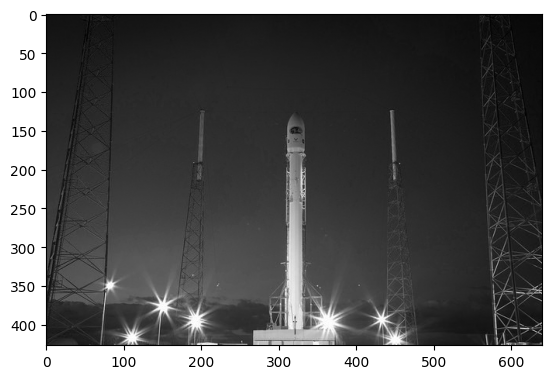

In [35]:
# Extract individual color channels from the RGB image
# Display the blue channel in grayscale
blue = image[:, :, 0]
green = image[:, :, 1]
red = image[:, :, 2]
plt.imshow(blue, cmap='gray')

In [36]:
# Display dimensions of the blue channel
# Print shape as tuple and individual row/column values
blue_rows, blue_cols = blue.shape

print(blue.shape)
print(blue_rows)
print(blue_cols)

(427, 640)
427
640


In [37]:
def addConstToBlueChannel(image, const):
    rows, cols, channels = image.shape
    output = image.copy()
    for r in range(rows):
        for c in range(cols):
            pixel = int(image[r, c, 0])  # Blue channel
            newPixel = pixel + const
            if newPixel > 255:
                newPixel = 255
            elif newPixel < 0:
                newPixel = 0
            output[r, c, 0] = newPixel
    return output

Text(0.5, 1.0, 'Image after adding 100 to each pixel in Blue channel')

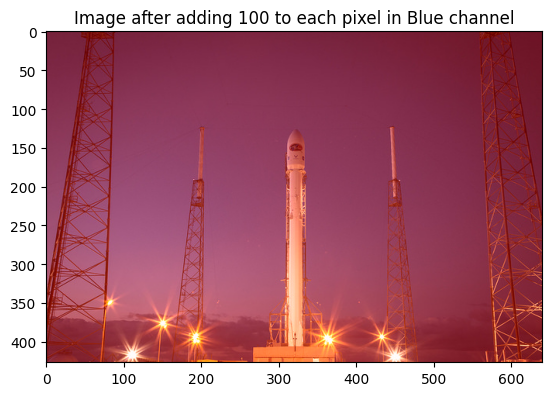

In [38]:
# Apply the addConstToBlueChannel function to increase blue intensity
# Add 100 to blue channel pixels and display the modified image
plt.imshow(addConstToBlueChannel(image, 100))
plt.title('Image after adding 100 to each pixel in Blue channel')